# Univariate Time Series With Stacked LSTM, BiLSTM, and NeuralProphet


---



Developing Deep learning LSTM, BiLSTM models, and NeuralProphet for multi-step forecasting of stock price
* This notebook is generated for the article: Univariate Time Series With Stacked LSTM, BiLSTM, and NeuralProphet.

# Import libraries



In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
from pylab import rcParams
from sklearn.model_selection import train_test_split as split
import warnings
import itertools
warnings.filterwarnings("ignore")
from IPython import display
from matplotlib import pyplot
import os
import re
#from colorama import Fore, Back, Style
import seaborn as sns
import plotly.express as px
import warnings
from matplotlib.patches import Patch

# Load data + Preprocess + Feature Transformation

In [3]:
data = pd.read_csv('AAPL.csv')

In [4]:
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2980 entries, 0 to 2979
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2980 non-null   datetime64[ns]
 1   Open       2980 non-null   float64       
 2   High       2980 non-null   float64       
 3   Low        2980 non-null   float64       
 4   Close      2980 non-null   float64       
 5   Adj Close  2980 non-null   float64       
 6   Volume     2980 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 163.1 KB


In [6]:

data=data.set_index(['Date'])
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.562589,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.573936,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.469368,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457407,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.500340,447610800


In [7]:
data.reset_index(inplace=True)

In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2980 entries, 0 to 2979
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2980 non-null   datetime64[ns]
 1   Open       2980 non-null   float64       
 2   High       2980 non-null   float64       
 3   Low        2980 non-null   float64       
 4   Close      2980 non-null   float64       
 5   Adj Close  2980 non-null   float64       
 6   Volume     2980 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 163.1 KB


In [9]:
data_feature_selected = data.drop(axis=1,labels=['Open','High','Low','Close','Volume'])

In [10]:
col_order = ['Date','Adj Close']
data_feature_selected = data_feature_selected.reindex(columns=col_order)
data_feature_selected

,Date,Adj Close
0,2010-01-04,6.562589
1,2010-01-05,6.573936
2,2010-01-06,6.469368
3,2010-01-07,6.457407
4,2010-01-08,6.500340
...,...,...
2975,2021-10-27,148.850006
2976,2021-10-28,152.570007
2977,2021-10-29,149.800003
2978,2021-11-01,148.960007


In [11]:
# X1=  x1[['beds','Reviews','rating']]
# y= x1['Log_price']

In [12]:
data_feature_selected['differenced_trasnformation_demand'] = data_feature_selected['Adj Close'].diff().values
data_feature_selected.head()

,Date,Adj Close,differenced_trasnformation_demand
0,2010-01-04,6.562589,NaN
1,2010-01-05,6.573936,0.011347
2,2010-01-06,6.469368,-0.104568
3,2010-01-07,6.457407,-0.011961
4,2010-01-08,6.500340,0.042933


In [13]:

data_feature_selected['differenced_demand_filled'] = np.where(pd.isnull(data_feature_selected['differenced_trasnformation_demand']), data_feature_selected['Adj Close'], data_feature_selected['differenced_trasnformation_demand'])
data_feature_selected.head()

,Date,Adj Close,differenced_trasnformation_demand,differenced_demand_filled
0,2010-01-04,6.562589,NaN,6.562589
1,2010-01-05,6.573936,0.011347,0.011347
2,2010-01-06,6.469368,-0.104568,-0.104568
3,2010-01-07,6.457407,-0.011961,-0.011961
4,2010-01-08,6.500340,0.042933,0.042933


In [14]:

data_feature_selected['differenced_inv_transformation_demand'] = data_feature_selected['differenced_demand_filled'].cumsum()
np.testing.assert_array_equal(data_feature_selected['Adj Close'].values, data_feature_selected['differenced_inv_transformation_demand'].values)

In [15]:
data_feature_selected.head()

,Date,Adj Close,differenced_trasnformation_demand,differenced_demand_filled,differenced_inv_transformation_demand
0,2010-01-04,6.562589,NaN,6.562589,6.562589
1,2010-01-05,6.573936,0.011347,0.011347,6.573936
2,2010-01-06,6.469368,-0.104568,-0.104568,6.469368
3,2010-01-07,6.457407,-0.011961,-0.011961,6.457407
4,2010-01-08,6.500340,0.042933,0.042933,6.500340


# plot

In [16]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.metrics as metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [17]:
FIGURE_SIZE = (20, 10)
plt.rcParams['axes.grid'] = True

%matplotlib inline


<Axes: xlabel='Date'>

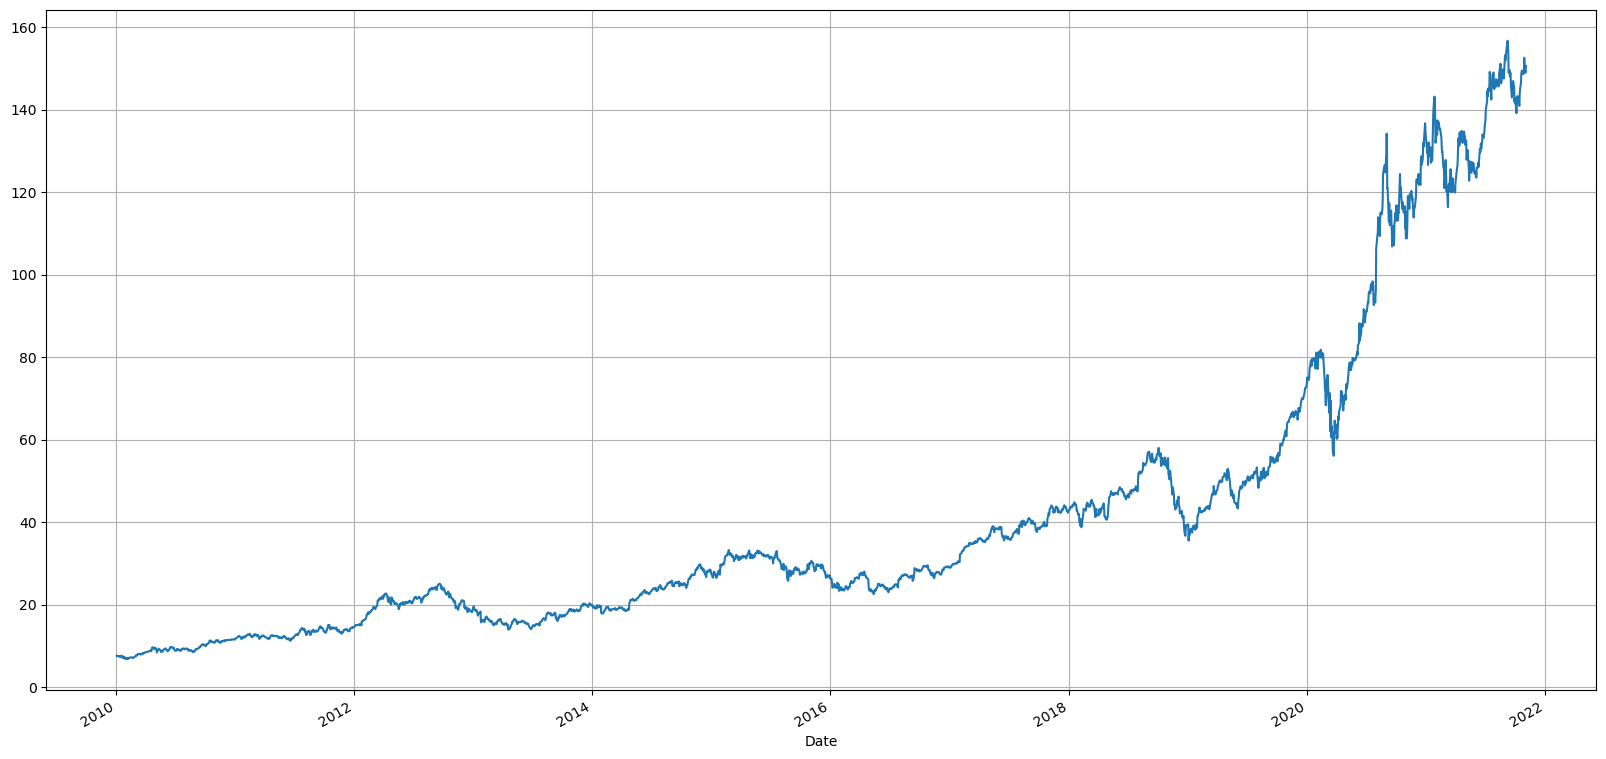

In [18]:
data.set_index('Date')['Close'].plot(figsize=FIGURE_SIZE)

<Axes: xlabel='Date'>

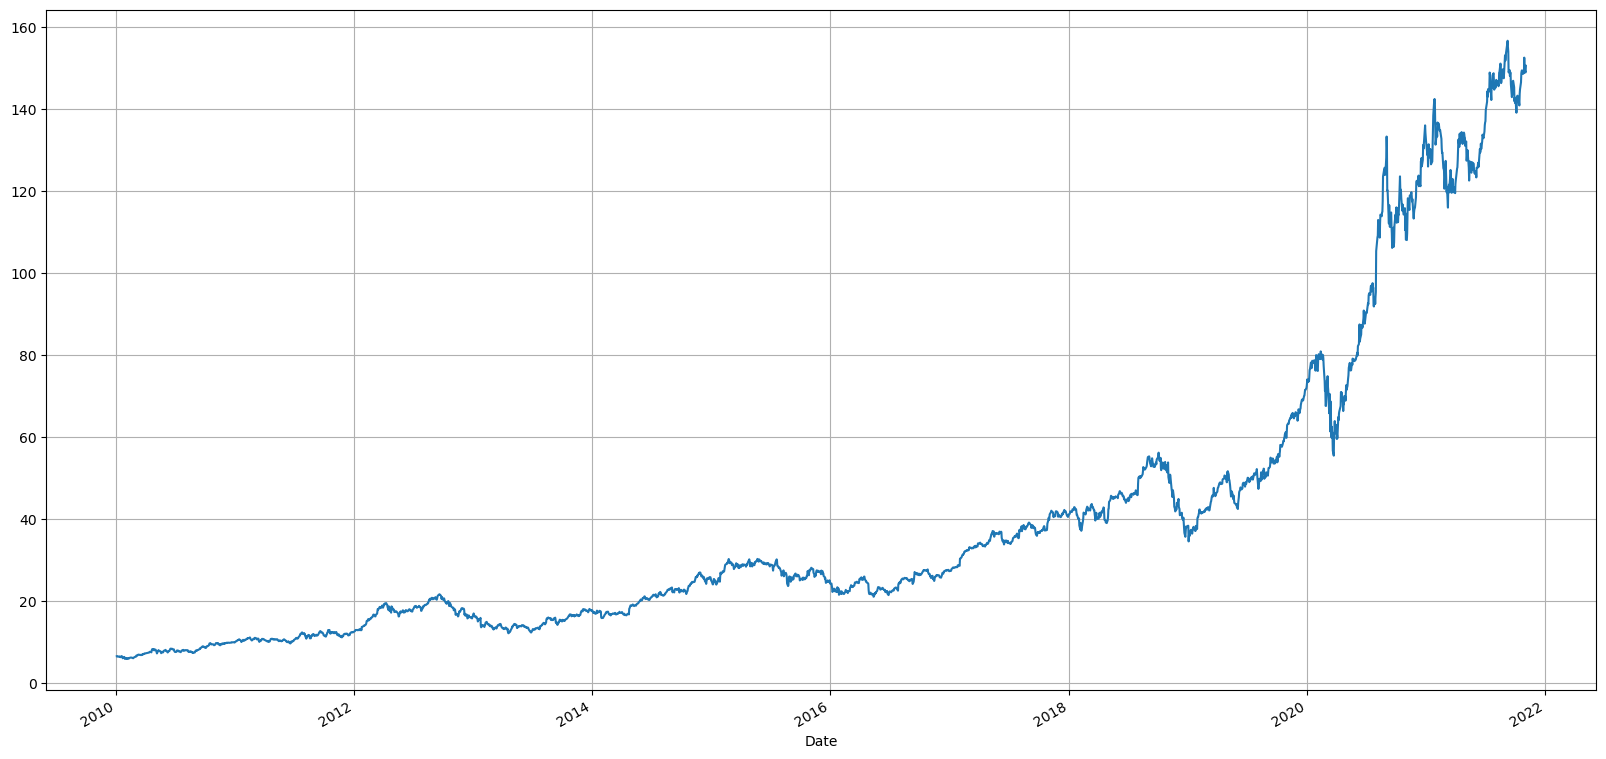

In [19]:
data_feature_selected.set_index('Date')['Adj Close'].plot(figsize=FIGURE_SIZE)

# Trasnformation 

<Axes: xlabel='Date'>

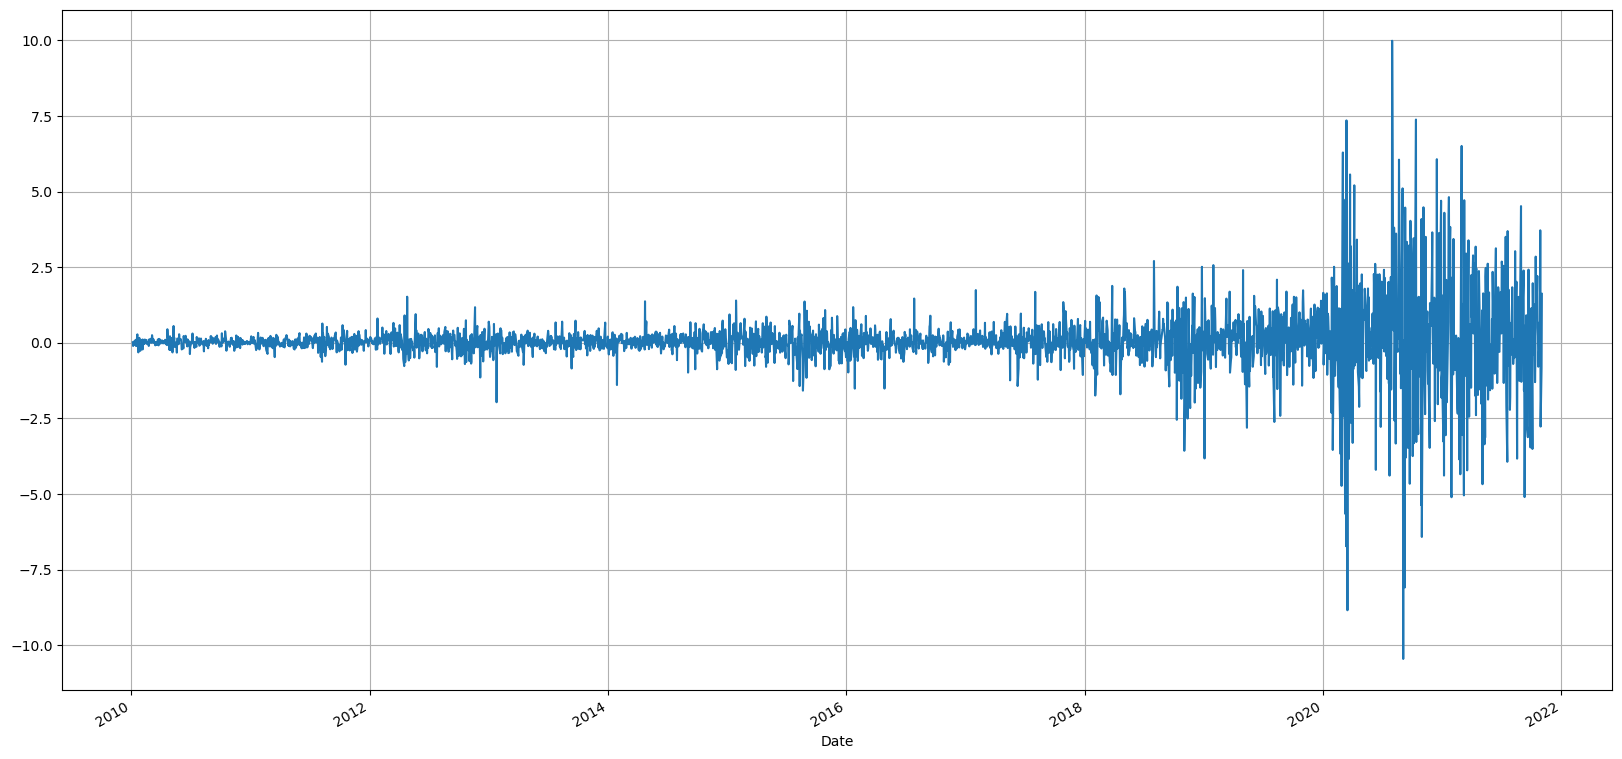

In [20]:
data_feature_selected.set_index('Date')['differenced_trasnformation_demand'].plot(figsize=FIGURE_SIZE)

<Axes: xlabel='Date'>

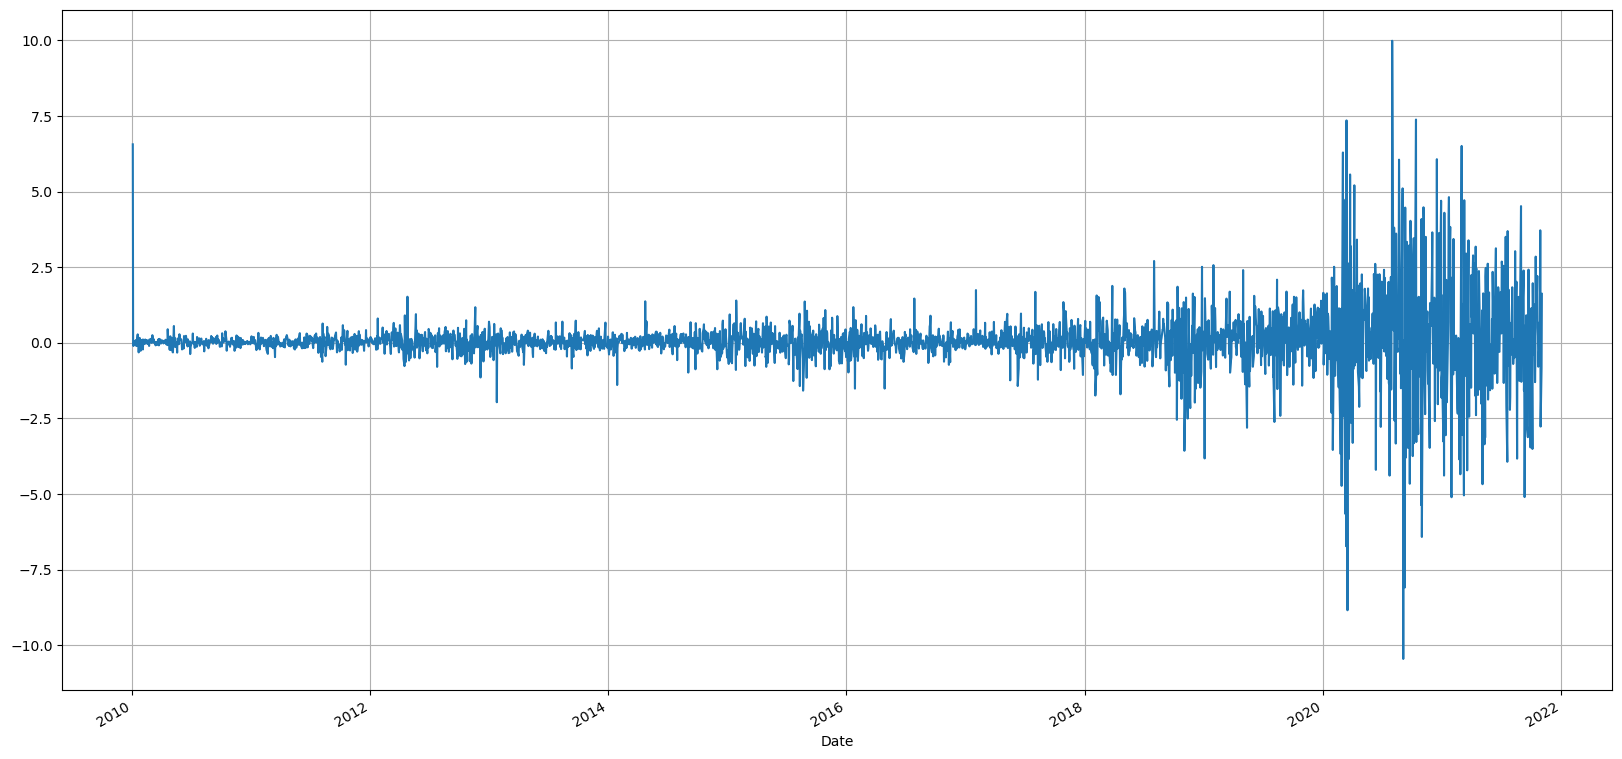

In [21]:
data_feature_selected.set_index('Date')['differenced_demand_filled'].plot(figsize=FIGURE_SIZE)

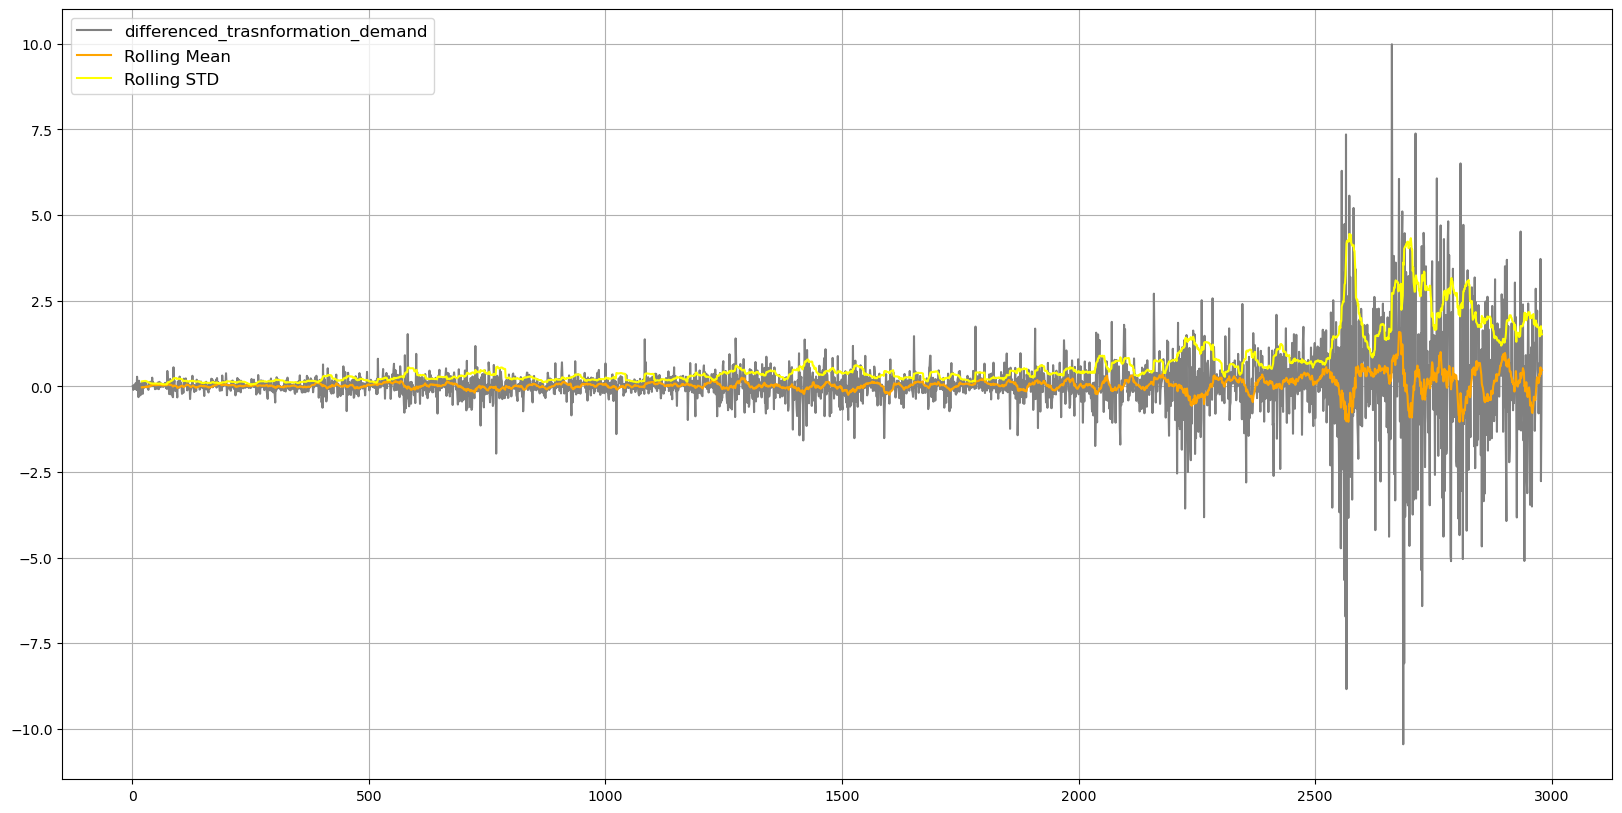

In [22]:
fig, ax = plt.subplots(figsize=(20,10))
data_feature_selected['differenced_trasnformation_demand'][1:].plot(c='grey')
data_feature_selected['differenced_trasnformation_demand'][1:].rolling(20).mean().plot(label='Rolling Mean',c='orange')
data_feature_selected['differenced_trasnformation_demand'][1:].rolling(20).std().plot(label='Rolling STD',c='yellow')
plt.legend(prop={'size': 12})

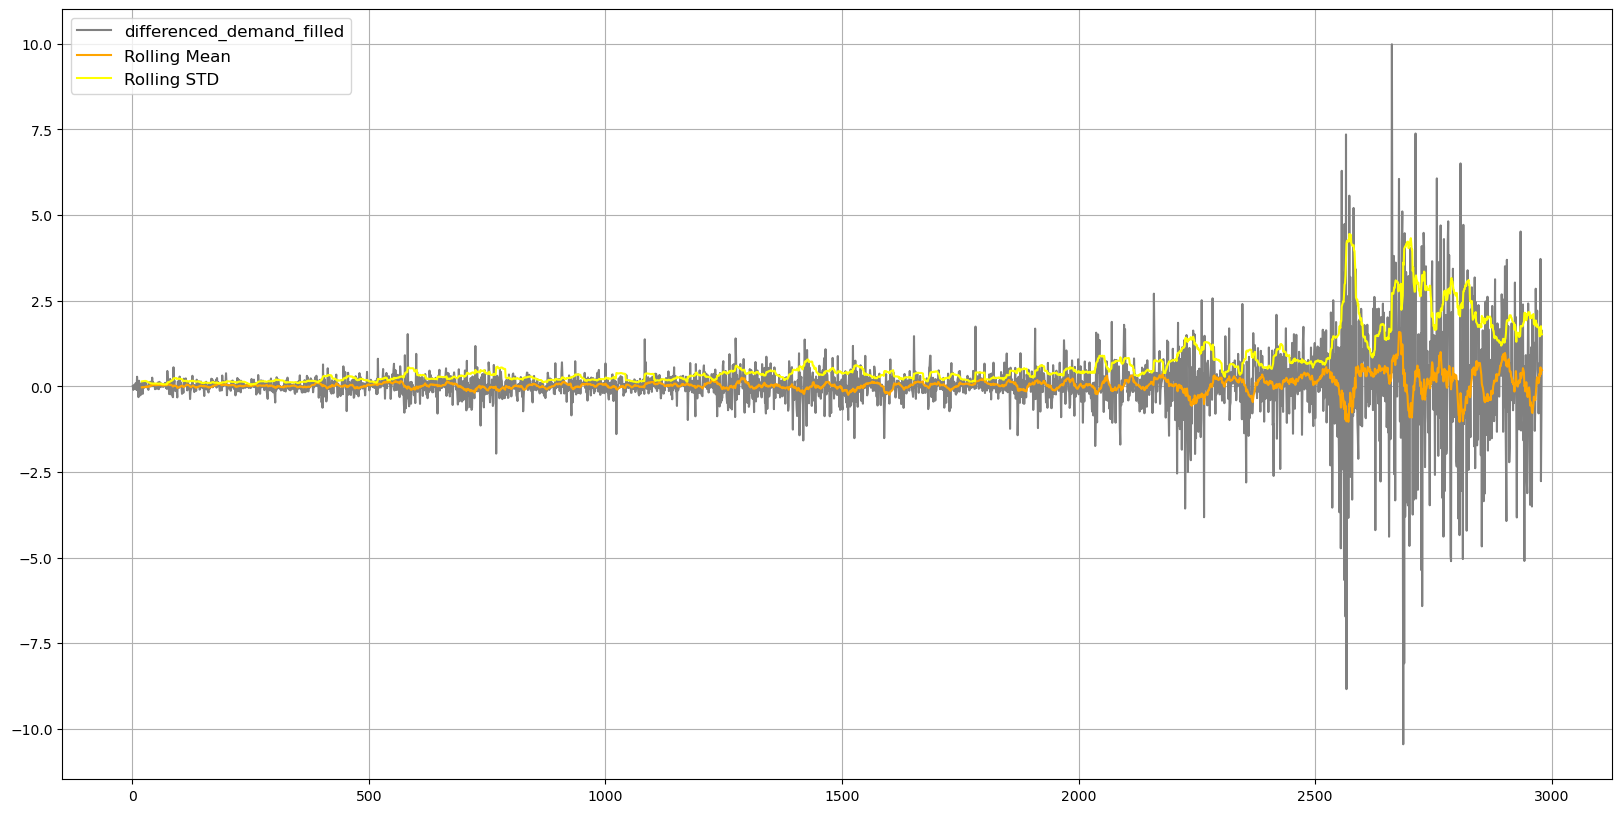

In [23]:
fig, ax = plt.subplots(figsize=(20,10))
data_feature_selected['differenced_demand_filled'][1:].plot(c='grey')
data_feature_selected['differenced_demand_filled'][1:].rolling(20).mean().plot(label='Rolling Mean',c='orange')
data_feature_selected['differenced_demand_filled'][1:].rolling(20).std().plot(label='Rolling STD',c='yellow')
plt.legend(prop={'size': 12})

Exporting data to use later as stock.csv

In [24]:
#data_feature_selected.to_csv("stock.csv", index=False)

KPSS test , to check stationary

In [25]:

# KPSS test
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(data_feature_selected['differenced_demand_filled'])

KPSS Statistic: 0.6974417332286638
p-value: 0.013778024251939656
num lags: 4
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


In [26]:
def build_temporal_features(data: pd.DataFrame) -> pd.DataFrame:
    # Temporal features
    data_feature_selected['date'] = pd.to_datetime(data['Date'])
    data_feature_selected['year'] = data_feature_selected['Date'].dt.year
    data_feature_selected['month'] = data_feature_selected['Date'].dt.month
    data_feature_selected['week'] = data_feature_selected['Date'].dt.week
    data_feature_selected['day'] = data_feature_selected['Date'].dt.day
    data_feature_selected['dayofweek'] = data_feature_selected['Date'].dt.dayofweek
    #data['quarter'] = data['date'].dt.quarter
    data_feature_selected['week_of_month'] = data['day'].apply(lambda x: np.ceil(x / 7)).astype(np.int8)
    data_feature_selected['is_weekend'] = (data_feature_selected['dayofweek'] > 5).astype(np.int8)
    
    return data_feature_selected

In [28]:
def build_temporal_features(data: pd.DataFrame) -> pd.DataFrame:
    # Assuming 'Date' is already a datetime column
    data['year'] = data['Date'].dt.year
    data['month'] = data['Date'].dt.month
    data['week'] = data['Date'].dt.isocalendar().week  # Corrected line
    data['day'] = data['Date'].dt.day
    data['dayofweek'] = data['Date'].dt.dayofweek
    return data

In [31]:
df1 = build_temporal_features(data_feature_selected)
df1['is_weekend'] = df1['Date'].dt.dayofweek >= 5
df_weekend = df1[df1['is_weekend'] == 1]

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.2000000000000002, '1.2'),
  Text(0, 1.4000000000000001, '1.4')])

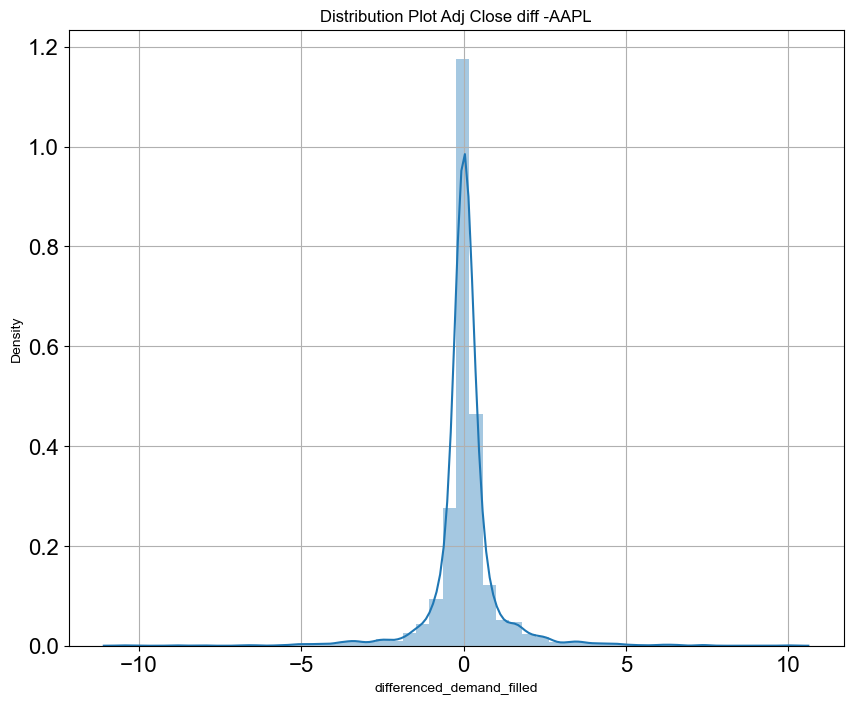

In [32]:
fig = plt.figure(figsize=(10,8))
sns.distplot(df1['differenced_demand_filled']).set_title("Distribution Plot Adj Close diff -AAPL")
#ax.tick_params(labelsize=12)
sns.set(font_scale=1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Save old data after transformation  and load 

In [33]:
df1 = pd.read_csv('stock.csv')

In [34]:
df1

,Date,Adj Close,differenced_trasnformation_demand,differenced_demand_filled,differenced_inv_transformation_demand,date,year,month,week,day,dayofweek,week_of_month,is_weekend
0,2010-01-04,6.562589,NaN,6.562589,6.562589,2010-01-04,2010,1,1,4,0,1,0
1,2010-01-05,6.573936,0.011347,0.011347,6.573936,2010-01-05,2010,1,1,5,1,1,0
2,2010-01-06,6.469368,-0.104568,-0.104568,6.469368,2010-01-06,2010,1,1,6,2,1,0
3,2010-01-07,6.457407,-0.011961,-0.011961,6.457407,2010-01-07,2010,1,1,7,3,1,0
4,2010-01-08,6.500340,0.042933,0.042933,6.500340,2010-01-08,2010,1,1,8,4,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2975,2021-10-27,148.850006,-0.470001,-0.470001,148.850006,2021-10-27,2021,10,43,27,2,4,0
2976,2021-10-28,152.570007,3.720001,3.720001,152.570007,2021-10-28,2021,10,43,28,3,4,0
2977,2021-10-29,149.800003,-2.770004,-2.770004,149.800003,2021-10-29,2021,10,43,29,4,5,0
2978,2021-11-01,148.960007,-0.839996,-0.839996,148.960007,2021-11-01,2021,11,44,1,0,1,0


Choose specific days with mask

In [35]:

mask = (df1['Date'] > '2010-01-01') & (df1['Date'] <= '2021-12-31')
print(df1.loc[mask])

            Date   Adj Close  differenced_trasnformation_demand  \
0     2010-01-04    6.562589                                NaN   
1     2010-01-05    6.573936                           0.011347   
2     2010-01-06    6.469368                          -0.104568   
3     2010-01-07    6.457407                          -0.011961   
4     2010-01-08    6.500340                           0.042933   
...          ...         ...                                ...   
2975  2021-10-27  148.850006                          -0.470001   
2976  2021-10-28  152.570007                           3.720001   
2977  2021-10-29  149.800003                          -2.770004   
2978  2021-11-01  148.960007                          -0.839996   
2979  2021-11-02  150.580002                           1.619995   

      differenced_demand_filled  differenced_inv_transformation_demand  \
0                      6.562589                               6.562589   
1                      0.011347                

In [36]:
df12=df1.loc[mask]

In [37]:
df12

,Date,Adj Close,differenced_trasnformation_demand,differenced_demand_filled,differenced_inv_transformation_demand,date,year,month,week,day,dayofweek,week_of_month,is_weekend
0,2010-01-04,6.562589,NaN,6.562589,6.562589,2010-01-04,2010,1,1,4,0,1,0
1,2010-01-05,6.573936,0.011347,0.011347,6.573936,2010-01-05,2010,1,1,5,1,1,0
2,2010-01-06,6.469368,-0.104568,-0.104568,6.469368,2010-01-06,2010,1,1,6,2,1,0
3,2010-01-07,6.457407,-0.011961,-0.011961,6.457407,2010-01-07,2010,1,1,7,3,1,0
4,2010-01-08,6.500340,0.042933,0.042933,6.500340,2010-01-08,2010,1,1,8,4,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2975,2021-10-27,148.850006,-0.470001,-0.470001,148.850006,2021-10-27,2021,10,43,27,2,4,0
2976,2021-10-28,152.570007,3.720001,3.720001,152.570007,2021-10-28,2021,10,43,28,3,4,0
2977,2021-10-29,149.800003,-2.770004,-2.770004,149.800003,2021-10-29,2021,10,43,29,4,5,0
2978,2021-11-01,148.960007,-0.839996,-0.839996,148.960007,2021-11-01,2021,11,44,1,0,1,0


In [38]:
#X=  df12[['Date']]
#y= df12['differenced_demand_filled']


selecting y as ['Adj Close']

In [39]:
y = df1['Adj Close']

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
y=scaler.fit_transform(np.array(y).reshape(-1,1))

In [41]:
##splitting dataset into train and test split
training_size=int(len(y)*0.65)
test_size=len(y)-training_size
train_data,test_data=y[0:training_size,:],y[training_size:len(y),:1]

In [42]:
training_size,test_size

(1937, 1043)

In [43]:
train_data[2]

array([0.00384731])

In [44]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]    
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [45]:
import numpy

In [46]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [47]:
print(X_train.shape), print(y_train.shape)

(1836, 100)
(1836,)


(None, None)

In [48]:
print(X_test.shape), print(ytest.shape)

(942, 100)
(942,)


(None, None)

In [49]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [50]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout ,BatchNormalization
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.initializers import RandomNormal, Constant


# Tunning LSTM

In [51]:
# # Build the LSTM Stack model
model=Sequential()
# Adding first LSTM layer
model.add(LSTM(150,return_sequences=True,input_shape=(100,1)))
model.add(Dropout(0.2)) # Dropout regularisation
# second LSTM layer 
model.add(LSTM(150,return_sequences=True))
# Adding third LSTM layer 
model.add(LSTM(150, return_sequences=True))
model.add(Dropout(0.2))
# Adding fourth LSTM layer
model.add(LSTM(150))
model.add(Dropout(0.2))
# Adding the Output Layer
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')




In [52]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 150)            │          91,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 150)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 150)            │         180,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 150)            │         180,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 150)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 150)                 │         180,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             151 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 633,151 (2.42 MB)

 Trainable params: 633,151 (2.42 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
#history= model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=54,batch_size=64,verbose=1)

EarlyStopping


In [54]:
from tensorflow.keras.callbacks import EarlyStopping


In [55]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=30, 
        verbose=1, mode='auto', restore_best_weights=True)

history=model.fit(X_train,y_train,validation_data=(X_test,ytest),
        callbacks=[monitor],verbose=1,epochs=1000)

Epoch 1/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 24s 293ms/step - loss: 0.0021 - val_loss: 0.0027
Epoch 2/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 15s 264ms/step - loss: 8.5449e-05 - val_loss: 0.0031
Epoch 3/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 19s 321ms/step - loss: 1.4318e-04 - val_loss: 0.0017
Epoch 4/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 19s 331ms/step - loss: 7.7324e-05 - val_loss: 0.0012
Epoch 5/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 19s 324ms/step - loss: 7.9054e-05 - val_loss: 0.0014
Epoch 6/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 18s 316ms/step - loss: 7.3904e-05 - val_loss: 8.8369e-04
Epoch 7/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 17s 293ms/step - loss: 6.5292e-05 - val_loss: 8.1253e-04
Epoch 8/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 19s 321ms/step - loss: 7.5814e-05 - val_loss: 8.1068e-04
Epoch 9/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 20s 344ms/step - loss: 6.4546e-05 - val_loss: 7.8881e-04
Epoch 10/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 20s 341ms/step - loss: 6.4891e-05 - val_loss: 8.9579e-04
Epoch 11/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 20s 337ms/st

***Running each time might change results***

 to avoid 
*   set seed
*   save weights of the model or save the whole model 

> 











In [56]:
model.save("lstm2022.h5") #save model 
#new_model = tf.keras.models.load_model('my_model.h5')

# Show the model architecture
#new_model.summary()

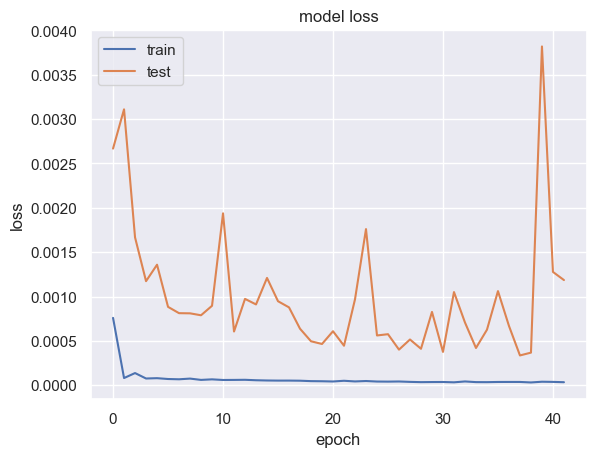

In [57]:
plt.plot(history.history['loss']) # tb
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show() 

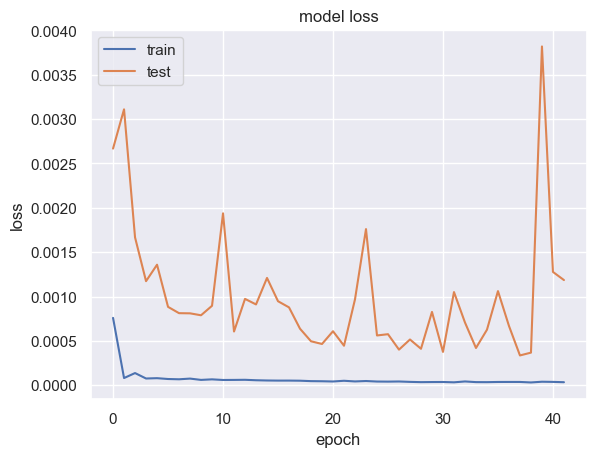

In [58]:
plt.plot(history.history['loss']) # t
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show() 

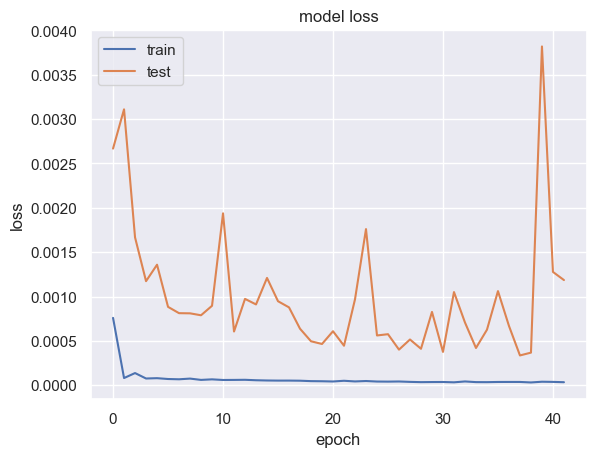

In [59]:
plt.plot(history.history['loss']) # tn
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show() 

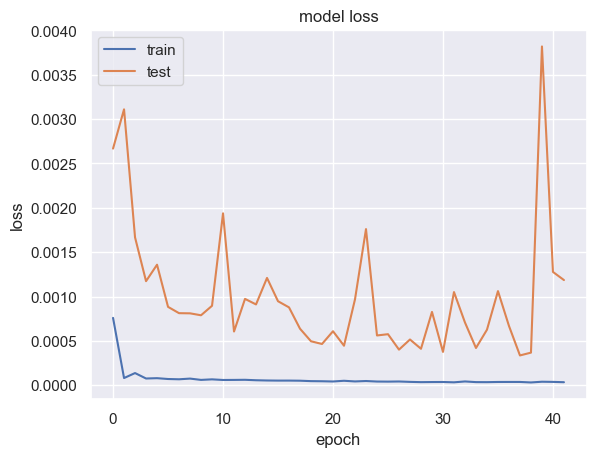

In [60]:
plt.plot(history.history['loss']) # t
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show() 

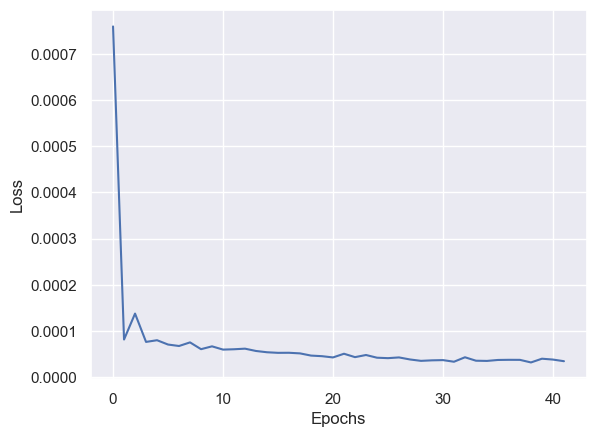

In [61]:
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

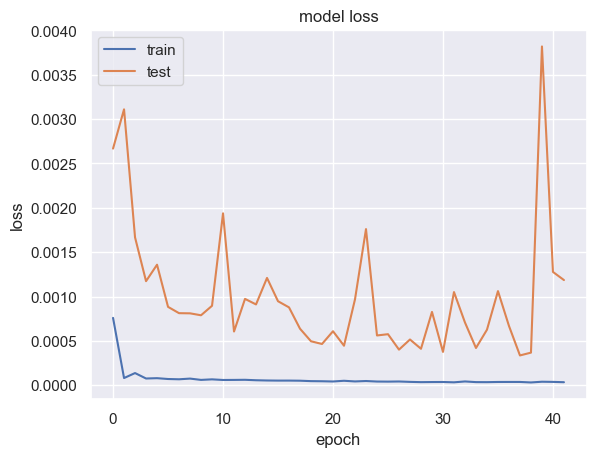

In [62]:
plt.plot(history.history['loss']) # t
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show() 

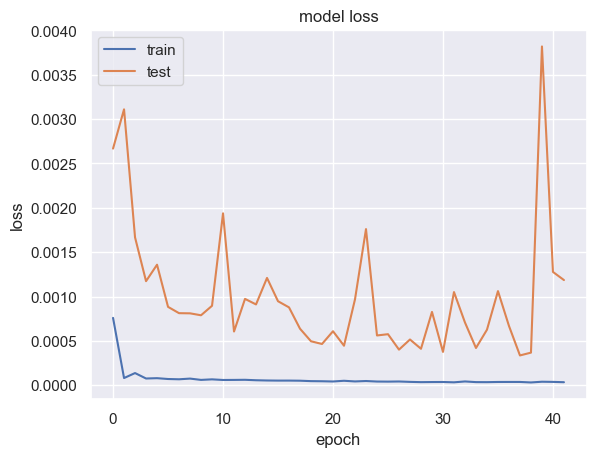

In [63]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [64]:
import tensorflow as tf

In [65]:
tf.__version__

'2.17.0'

In [66]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 155ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step


In [67]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [68]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

21.172398254454663

In [69]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest, test_predict)

79.6470843514471

In [70]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_train, train_predict)

19.721499611944605

In [71]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest, test_predict)

79.6470843514471

In [72]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

21.172398254454663

In [73]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

87.87248512746127

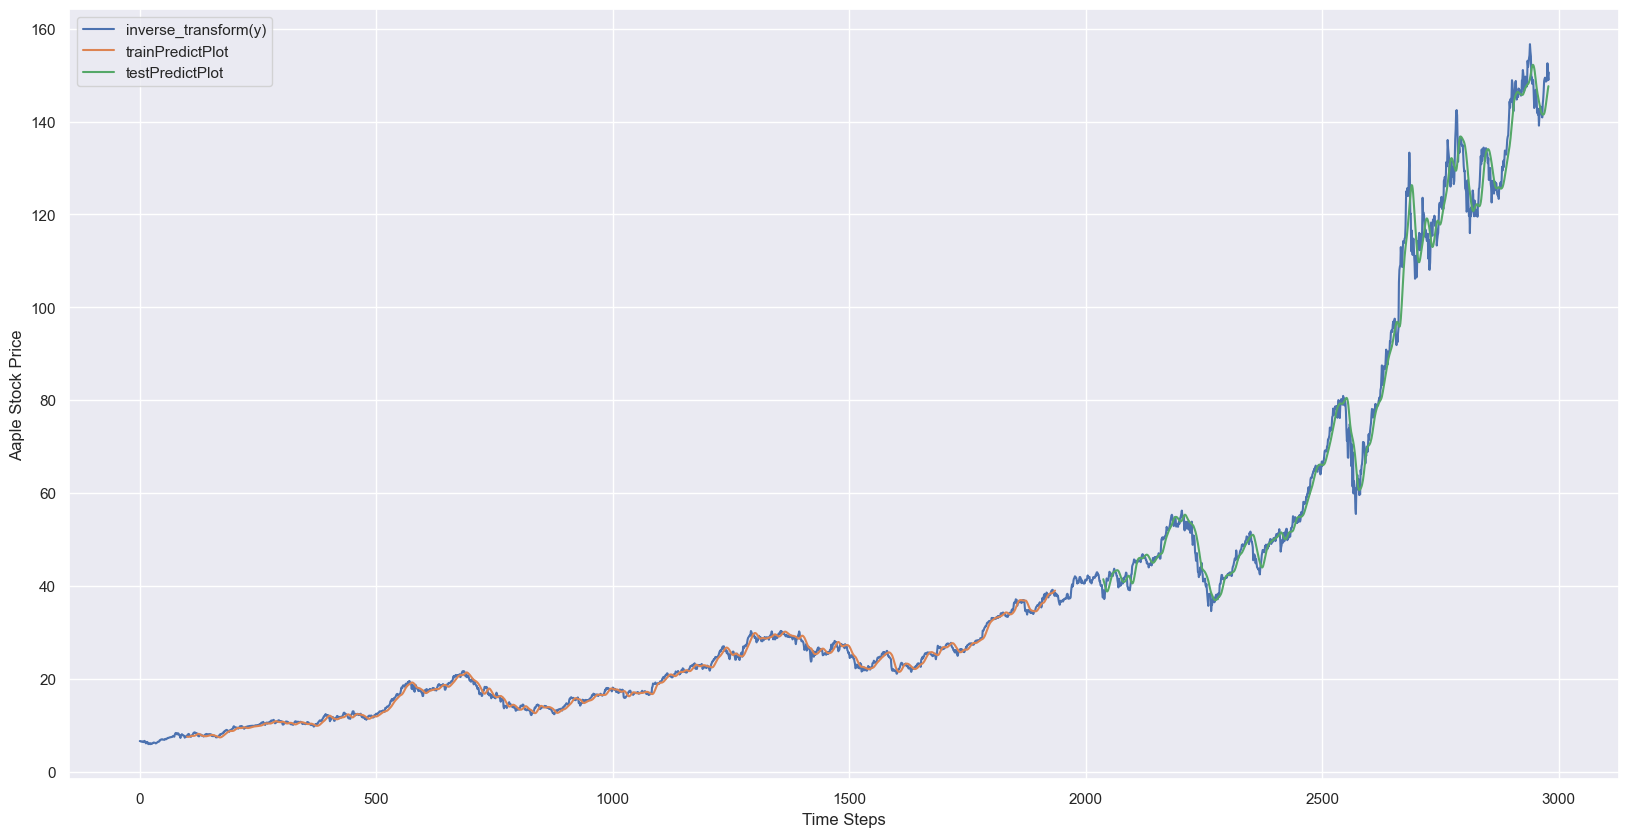

In [74]:
### Plotting 
# shift train predictions for plotting
look_back=100
fig, ax = plt.subplots(figsize=(20,10))
trainPredictPlot = numpy.empty_like(y)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(y)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(y)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(y))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['inverse_transform(y)','trainPredictPlot','testPredictPlot'])
plt.xlabel('Time Steps')
plt.ylabel('Aaple Stock Price')
plt.show()

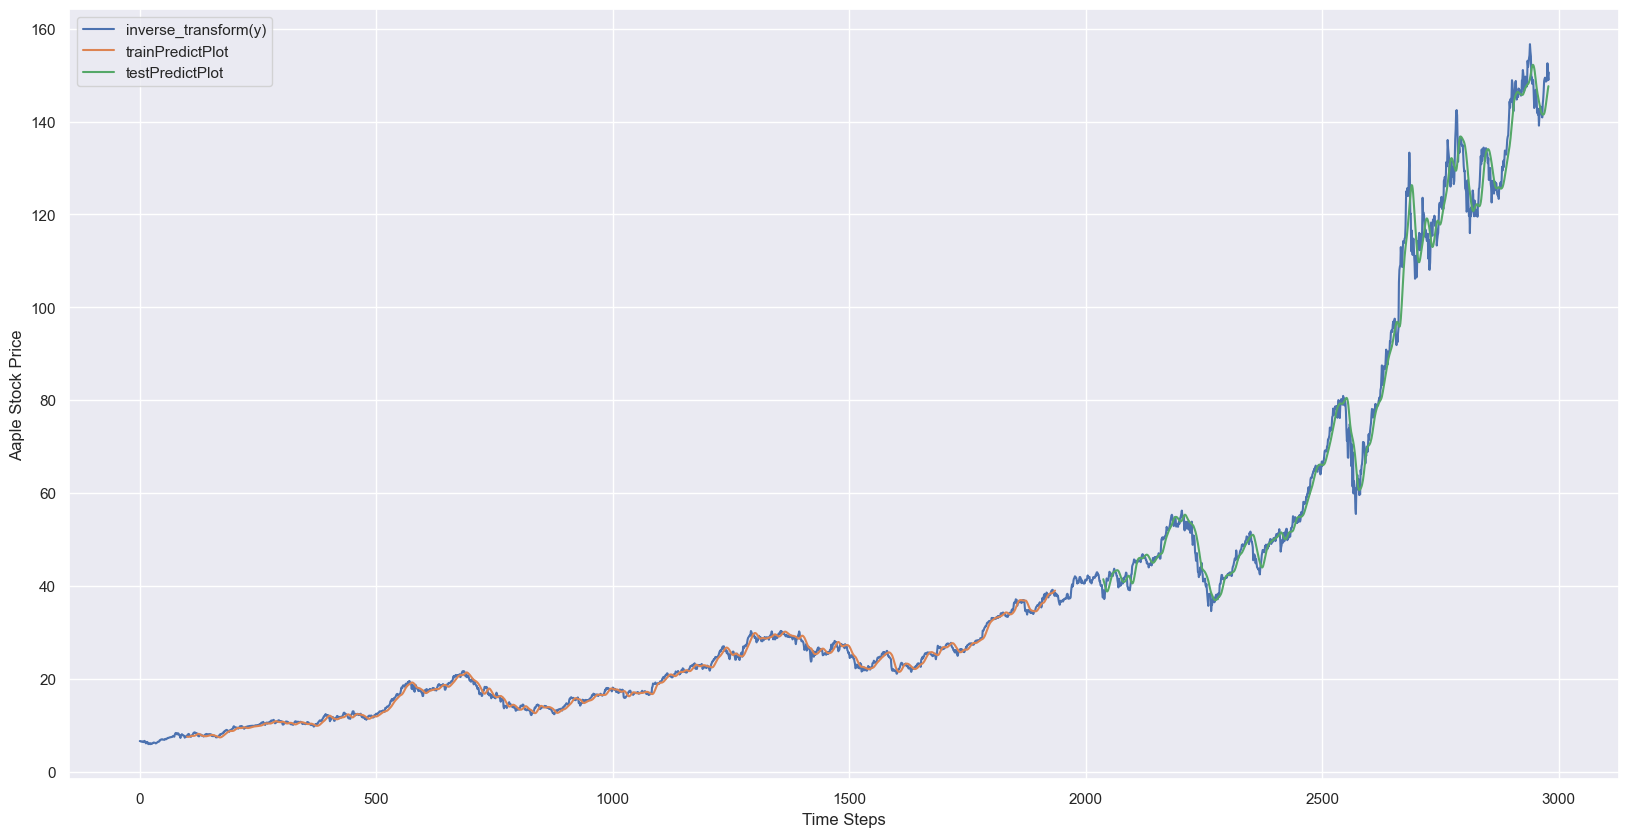

In [75]:
## Plotting 
# shift train predictions for plotting
look_back=100
fig, ax = plt.subplots(figsize=(20,10))
trainPredictPlot = numpy.empty_like(y)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(y)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(y)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(y))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['inverse_transform(y)','trainPredictPlot','testPredictPlot'])
plt.xlabel('Time Steps')
plt.ylabel('Aaple Stock Price')
plt.show()

In [76]:
# evaluate the model
train_mse = model.evaluate(X_train, y_train, verbose=1)
test_mse = model.evaluate(X_test, ytest, verbose=1)


58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - loss: 1.5709e-05
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - loss: 3.2062e-04


In [77]:
train_mse > test_mse

False

- Underfitting – Validation and training error high
- Overfitting – Validation error is high, training error low
- Good fit – Validation error low, slightly higher than the training error
- Unknown fit - Validation error low, training error 'high'


In [78]:
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 0.000, Test: 0.001


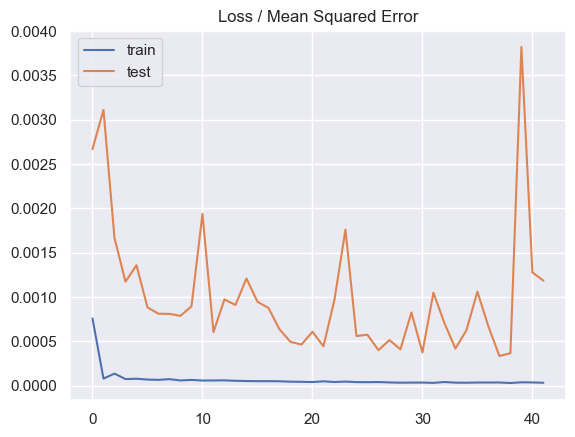

In [79]:
# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


If validation loss >> training loss you can call it overfitting.
If validation loss  > training loss you can call it some overfitting.
If validation loss  < training loss you can call it some underfitting.
If validation loss << training loss you can call it underfitting.

# Future forecasting 

In [80]:
len(test_data), len(train_data) # 2021-11-02 test-data last date

(1043, 1937)

In [81]:
x_input=test_data[943:].reshape(1,-1)
x_input.shape

(1, 100)

In [82]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [83]:
temp_input

[0.8249000675142254,
 0.81933822743607,
 0.8227150792795467,
 0.8335740526383905,
 0.8247677207467559,
 0.8369510039508277,
 0.8480747835760993,
 0.8462208744605436,
 0.8443006858610286,
 0.8423143172465147,
 0.8533719234880512,
 0.8636350247238724,
 0.8678064810420256,
 0.8698591158779704,
 0.8876705252754211,
 0.9013104717234547,
 0.9181949166162318,
 0.9093884786243726,
 0.9217703947111373,
 0.9177313912606785,
 0.9252796927910442,
 0.9485205888679168,
 0.9440843329146,
 0.9302456541149129,
 0.9041576181963795,
 0.9286565446345212,
 0.9236905833106523,
 0.9329604471891042,
 0.944614031653888,
 0.9474612775957734,
 0.9327618209376752,
 0.9209096102214624,
 0.9252796927910442,
 0.9267363560350061,
 0.9244851877853286,
 0.936668378151704,
 0.9339536845464733,
 0.9346820095371903,
 0.930040144611423,
 0.929708561516234,
 0.9264593084551828,
 0.9281834039461275,
 0.9482761206882627,
 0.9496687325529788,
 0.9630638129455167,
 0.9568967838183791,
 0.9314990359600984,
 0.9337536392045424,
 

In [84]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.94694704]
101
1 day input [0.81933823 0.82271508 0.83357405 0.82476772 0.836951   0.84807478
 0.84622087 0.84430069 0.84231432 0.85337192 0.86363502 0.86780648
 0.86985912 0.88767053 0.90131047 0.91819492 0.90938848 0.92177039
 0.91773139 0.92527969 0.94852059 0.94408433 0.93024565 0.90415762
 0.92865654 0.92369058 0.93296045 0.94461403 0.94746128 0.93276182
 0.92090961 0.92527969 0.92673636 0.92448519 0.93666838 0.93395368
 0.93468201 0.93004014 0.92970856 0.92645931 0.9281834  0.94827612
 0.94966873 0.96306381 0.95689678 0.93149904 0.93375364 0.94363426
 0.95371381 0.95311692 0.94476156 0.93932387 0.9463531  0.97632634
 0.96777206 0.97228127 0.9798409  0.98415129 1.         0.9895226
 0.98262612 0.94880664 0.95265278 0.94317002 0.9492045  0.94761295
 0.92950964 0.90882012 0.91206938 0.92811712 0.93461574 0.93521252
 0.92493404 0.90198993 0.90809068 0.89927109 0.906897   0.8836213
 0.8966849  0.90258672 0.911141   0.90855482 0.90795803 0.89933737
 0.89535867 0.91425771 0.92141948 0

In [85]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [86]:
import matplotlib.pyplot as plt

In [87]:
len(y)

2980

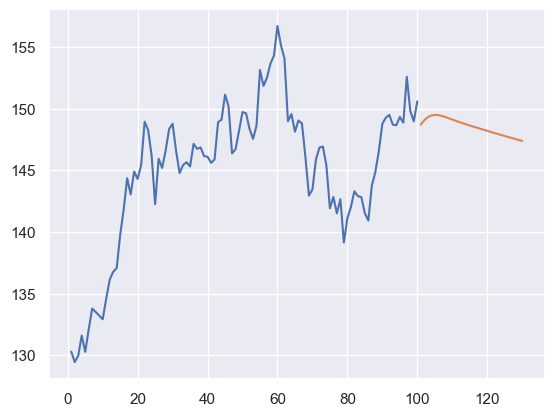

In [88]:
plt.plot(day_new,scaler.inverse_transform(y[2880:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

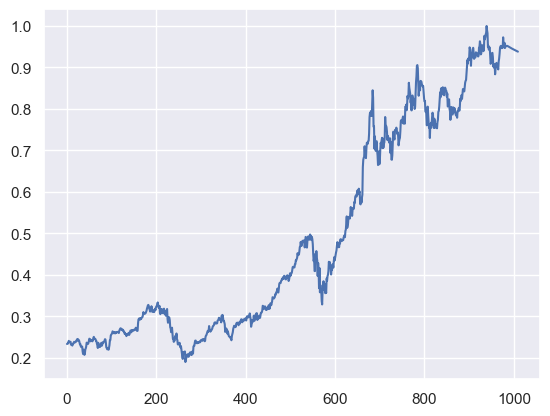

In [89]:
df3=y.tolist()
df3.extend(lst_output)
plt.plot(df3[2000:])


<Axes: xlabel='Date'>

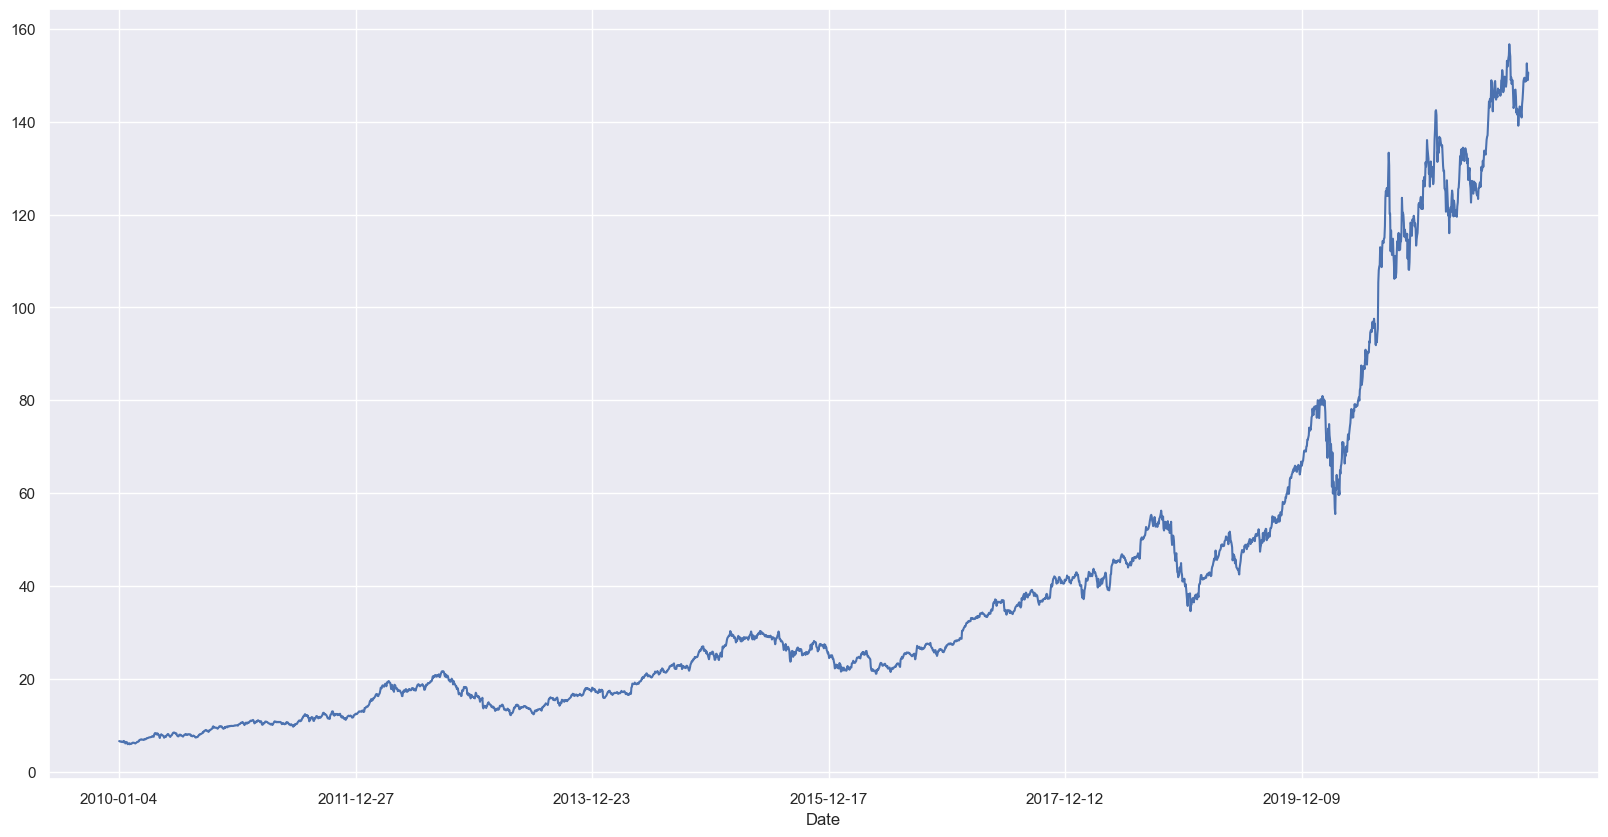

In [90]:
df1.set_index('Date')['Adj Close'].plot(figsize=FIGURE_SIZE)

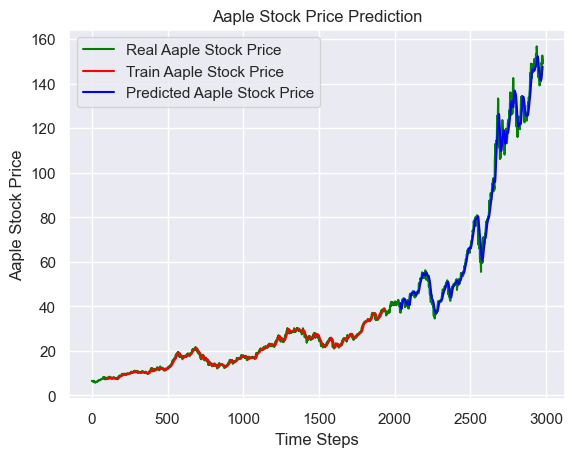

In [91]:
# Visualising the results. with details 

plt.plot(scaler.inverse_transform(y), color='Green', label='Real Aaple Stock Price')
plt.plot(trainPredictPlot, color='Red', label='Train Aaple Stock Price')
plt.plot(testPredictPlot, color='Blue', label='Predicted Aaple Stock Price')

plt.title('Aaple Stock Price Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Aaple Stock Price')
plt.legend()
plt.show()

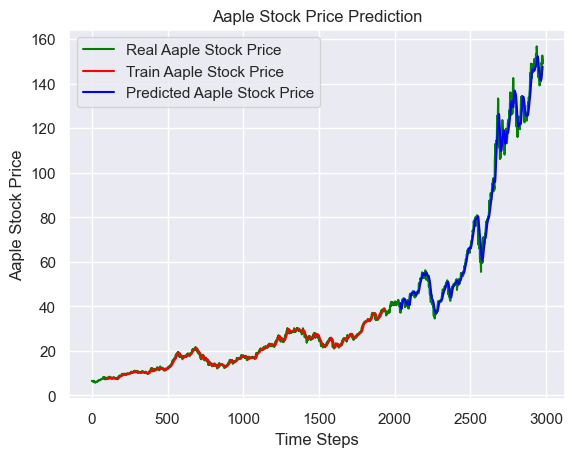

In [92]:
# Visualising the results. 

plt.plot(scaler.inverse_transform(y), color='Green', label='Real Aaple Stock Price')
plt.plot(trainPredictPlot, color='Red', label='Train Aaple Stock Price')
plt.plot(testPredictPlot, color='Blue', label='Predicted Aaple Stock Price')

plt.title('Aaple Stock Price Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Aaple Stock Price')
plt.legend()
plt.show()

# Bidirectional LSTM

In [93]:
from random import random
from numpy import array
from numpy import cumsum
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional


In [94]:
tf.random.set_seed(1234)

In [95]:

modell = Sequential()
modell.add(Bidirectional(LSTM(100, activation='relu', input_shape=(100,1)))) #elu
#modell.add(Bidirectional(LSTM(50, dropout=0.5)))

#modell.add(Bidirectional(LSTM(100, dropout=0.5)))
#modell.add(BatchNormalization(momentum=0.6))
modell.add(Dense(1))
modell.compile(loss='mean_squared_error', optimizer='adam') #rmsprop adam




In [96]:
from tensorflow.keras.callbacks import EarlyStopping

In [97]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=30, 
        verbose=1, mode='auto', restore_best_weights=True)

history1=modell.fit(X_train,y_train,validation_data=(X_test,ytest),
        callbacks=[monitor],verbose=1,epochs=1000)

Epoch 1/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - loss: 0.0024 - val_loss: 0.0089
Epoch 2/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 6.2063e-05 - val_loss: 0.0030
Epoch 3/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 4.0469e-05 - val_loss: 0.0058
Epoch 4/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 3.2806e-05 - val_loss: 0.0076
Epoch 5/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 3.0573e-05 - val_loss: 0.0092
Epoch 6/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 2.6372e-05 - val_loss: 0.0109
Epoch 7/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 2.1890e-05 - val_loss: 0.0112
Epoch 8/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 1.9055e-05 - val_loss: 0.0105
Epoch 9/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 1.7595e-05 - val_loss: 0.0094
Epoch 10/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 1.6603e-05 - val_loss: 0.0084
Epoch 11/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 1.5980e-05 - val_loss: 0.0069


In [98]:
modell.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 200)                 │          81,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 245,405 (958.62 KB)

 Trainable params: 81,801 (319.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 163,604 (639.08 KB)

***Running each time might change results***

*   List item
*   List item

> Indented block





In [99]:
modell.save("my_del.h5") #save model 
#new_model = tf.keras.models.load_model('my_model.h5')

# Show the model architecture
#new_model.summary()

In [101]:
modell.save_weights('my_model_weights.weights.h5')

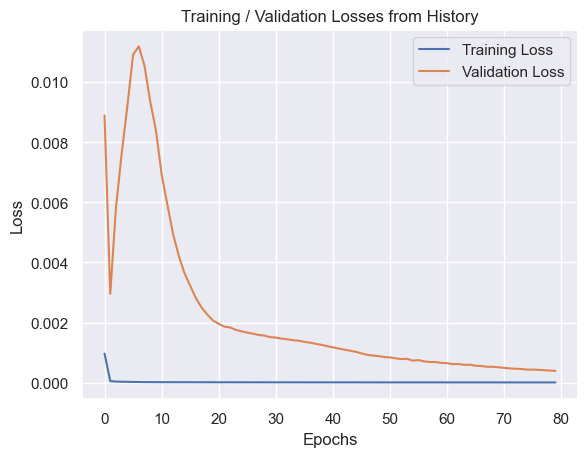

In [104]:
import matplotlib.pyplot as plt

# Define the plot_1 function
def plot_1(history, title=''):
    # Access the history.history dictionary to get loss values
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    
    # Adding labels and title
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(title)
    
    # Adding legend
    plt.legend()
    
    # Display the plot
    plt.show()

# Example usage (assuming 'history1' is the History object):
plot_1(history1, 'Training / Validation Losses from History')


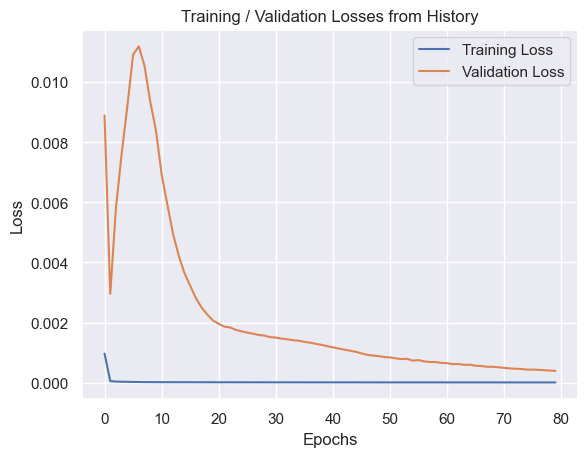

In [105]:
plot_1(history1, 'Training / Validation Losses from History')

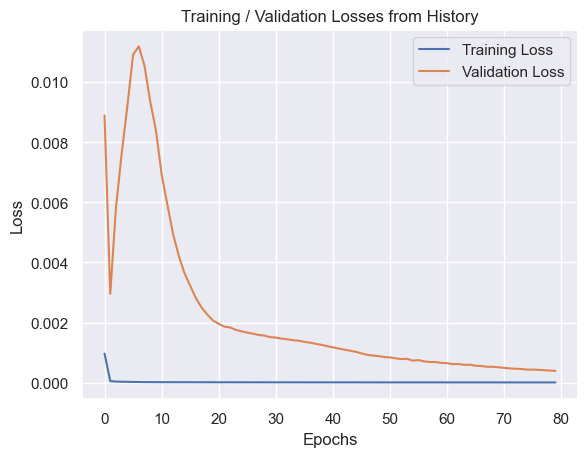

In [106]:
plot_1(history1, 'Training / Validation Losses from History')

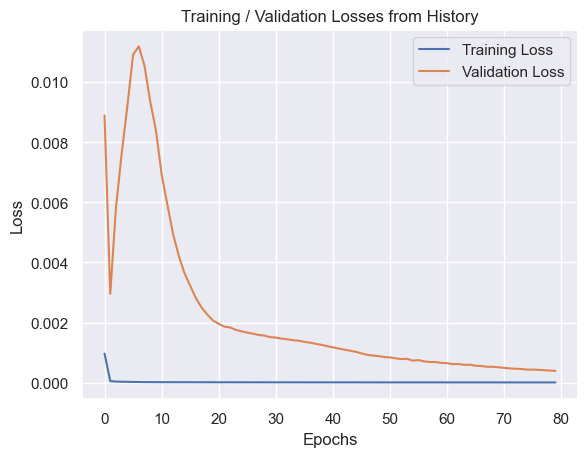

In [107]:
plot_1(history1, 'Training / Validation Losses from History')

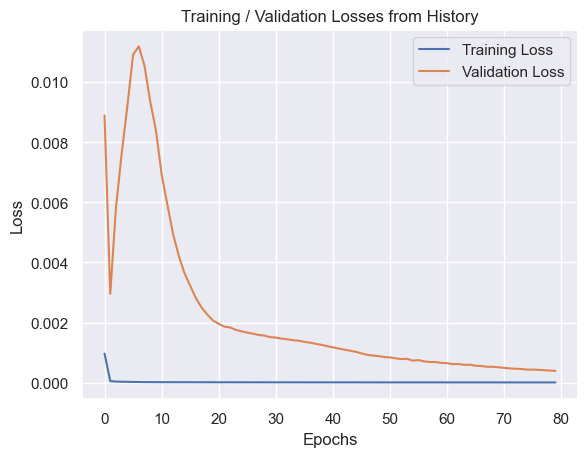

In [108]:
plot_1(history1, 'Training / Validation Losses from History')

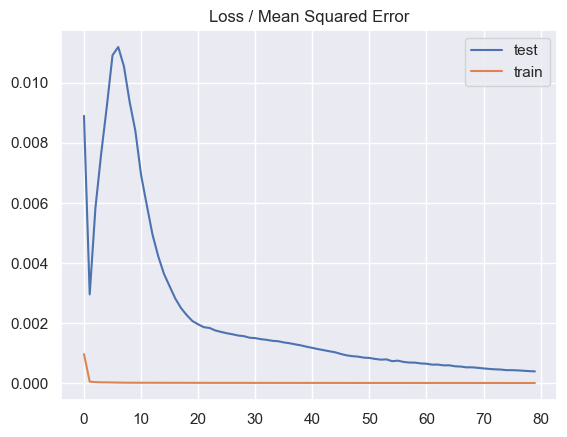

In [109]:
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history1.history['val_loss'], label='test')
pyplot.plot(history1.history['loss'], label='train')
pyplot.legend()
pyplot.show()

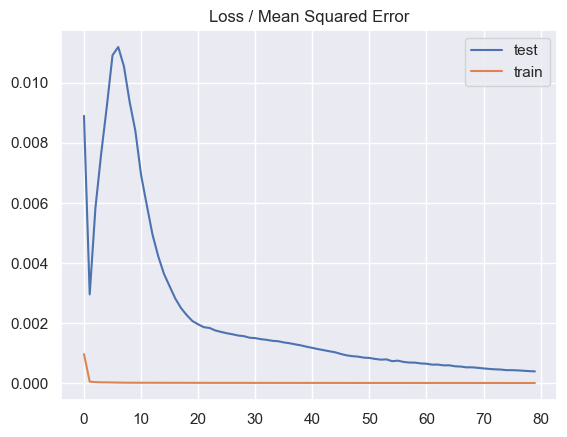

In [110]:
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history1.history['val_loss'], label='test')
pyplot.plot(history1.history['loss'], label='train')
pyplot.legend()
pyplot.show()

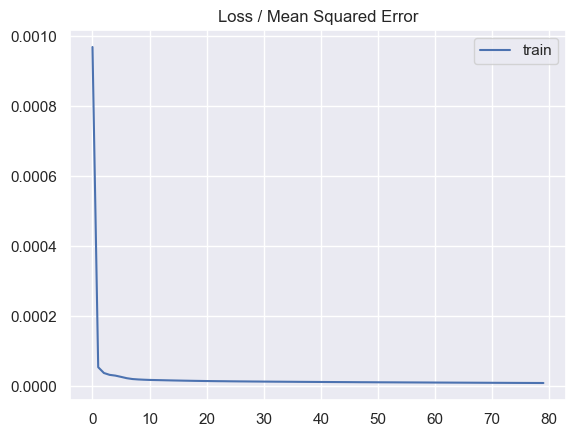

In [111]:
pyplot.title('Loss / Mean Squared Error')
#pyplot.plot(history1.history['val_loss'], label='test')
pyplot.plot(history1.history['loss'], label='train')
pyplot.legend()
pyplot.show()

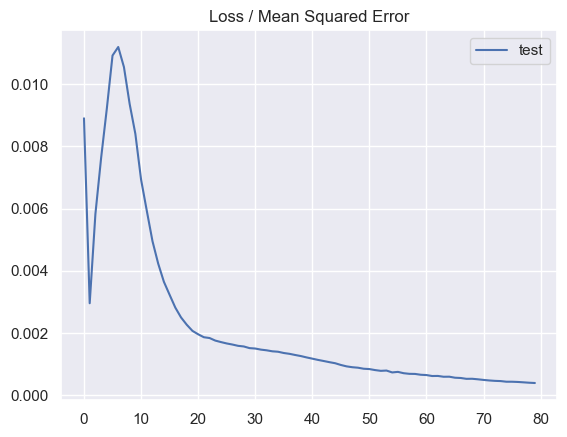

In [112]:
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history1.history['val_loss'], label='test')
#pyplot.plot(history1.history['loss'], label='train')
pyplot.legend()
pyplot.show()

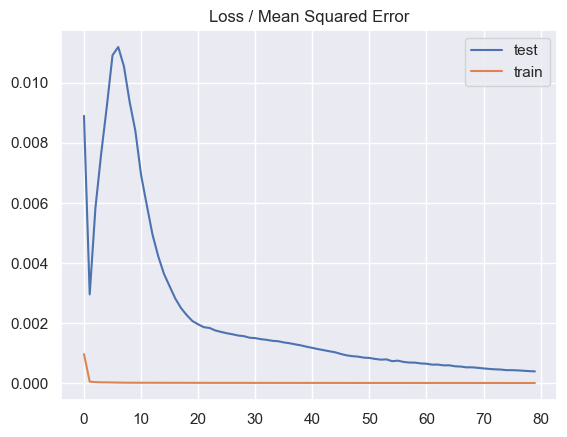

In [113]:
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history1.history['val_loss'], label='test')
pyplot.plot(history1.history['loss'], label='train')
pyplot.legend()
pyplot.show()

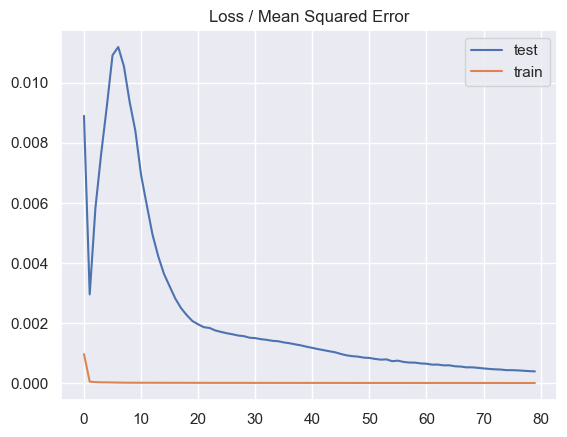

In [114]:
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history1.history['val_loss'], label='test')
pyplot.plot(history1.history['loss'], label='train')
pyplot.legend()
pyplot.show()

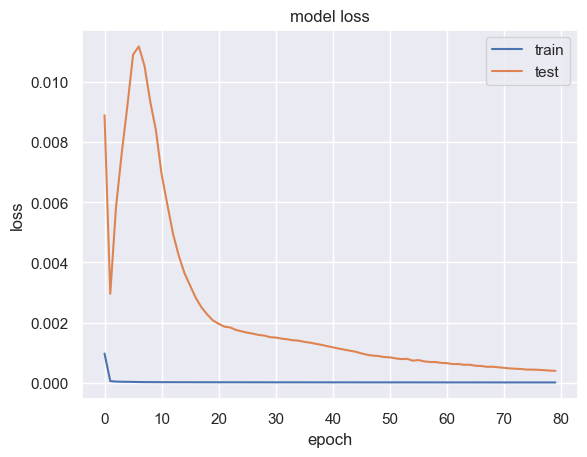

In [115]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'],loc='upper right')
plt.show()

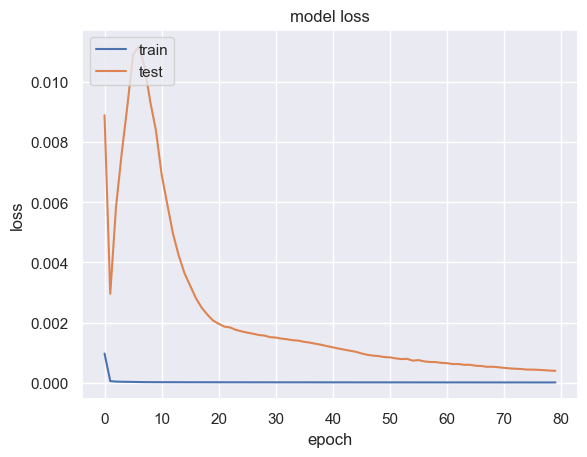

In [116]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

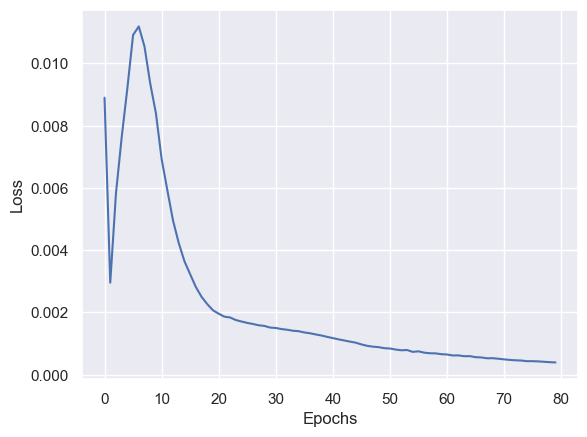

In [117]:
plt.plot(history1.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

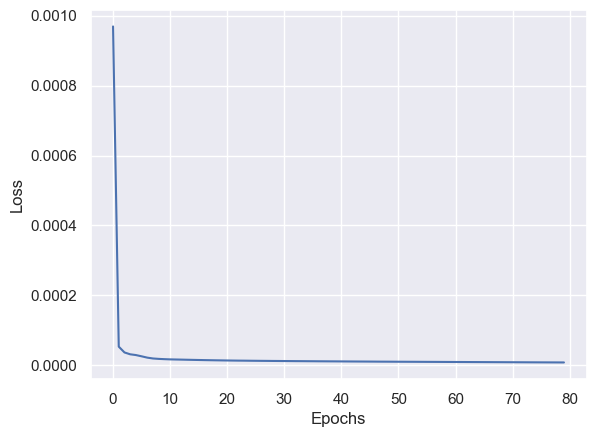

In [118]:
plt.plot(history1.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [119]:
train_predict=modell.predict(X_train)
test_predict=modell.predict(X_test)

58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


In [120]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [121]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

90.51145071863533

In [122]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

21.116215842431664

In [123]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

90.51145071863533

In [124]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

21.116215842431664

In [125]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

90.51145071863533

In [126]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

21.116215842431664

In [127]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

90.51145071863533

In [128]:
# create the list of difference between prediction and test data
predictions = modell.predict(X_test)
len(predictions)

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


942

In [129]:
def plot_1(history, title):
  """function that plots the loss results of the model"""
  plt.figure(figsize=(8,6))
  plt.plot(history1.history['loss'], 'o-', mfc='none', markersize=10, 
  label='Train')
  plt.plot(history1.history['val_loss'], 'o-', mfc='none', 
  markersize=10, label='Valid')
  plt.title('LSTM Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()


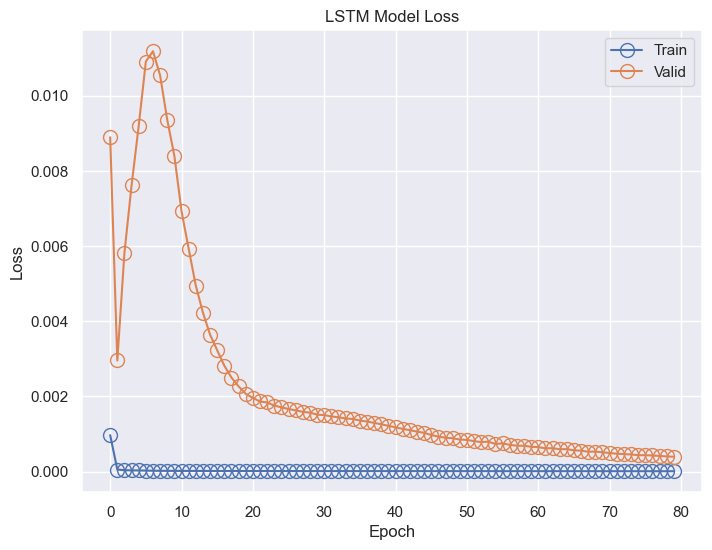

In [130]:
plot_1(history1, 'Training / Validation Losses from History')

In [131]:
def evaluate_predictions(predictions, ytest, outliers):
    ratio = []
    differences = []
    for pred in range(len(ytest)):
        ratio.append((ytest[pred]/predictions[pred])-1)
        differences.append(abs(ytest[pred]- predictions[pred]))
    
    
    n_outliers = int(len(differences) * outliers)
    outliers = pd.Series(differences).astype(float).nlargest(n_outliers)
    
    return ratio, differences, outliers

In [132]:
ratio, differences, outliers = evaluate_predictions(predictions, ytest, 0.01)

In [133]:
for index in outliers.index: 
    outliers[index] = predictions[index]
outliers

905    1.063638
651    0.814244
907    1.046702
906    1.054512
867    1.005238
911    1.008245
750    0.928963
910    1.020073
626    0.590508
dtype: float64

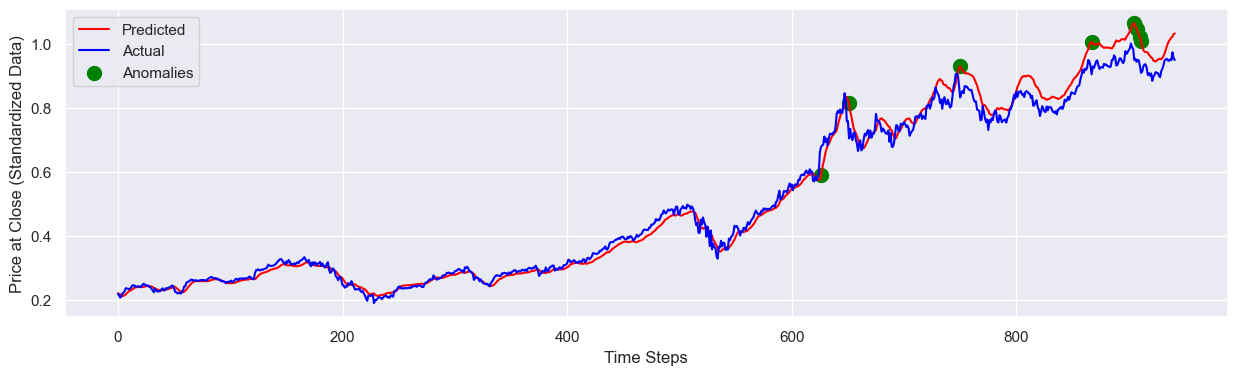

In [134]:

# Showing the predicted vs. actual values
fig, axs = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(15)

axs.plot(predictions,color='red', label='Predicted')
axs.plot(ytest,color='blue', label='Actual')
axs.scatter(outliers.index,outliers, color='green', linewidth=5.0, label='Anomalies')
plt.xlabel('Time Steps')
plt.ylabel('Price at Close (Standardized Data)')
plt.legend(loc='upper left')
plt.show()

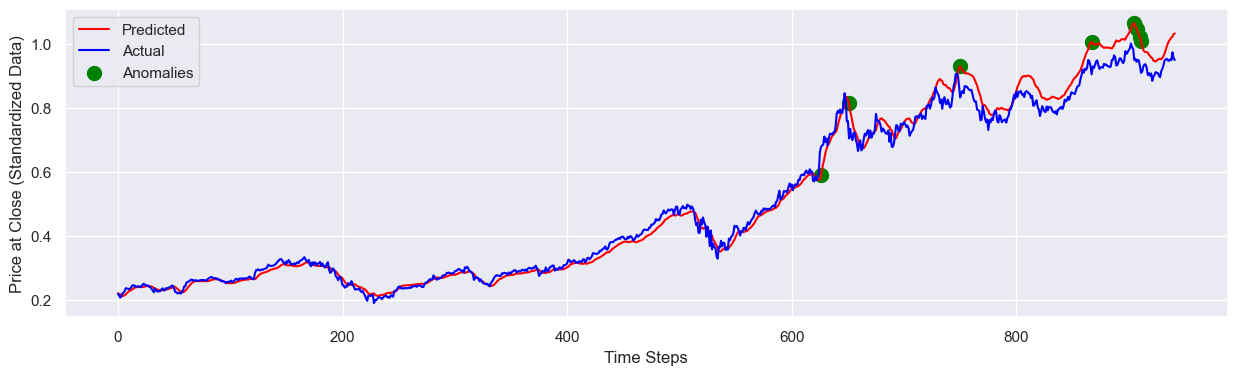

In [135]:

# Showing the predicted vs. actual values
fig, axs = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(15)

axs.plot(predictions,color='red', label='Predicted')
axs.plot(ytest,color='blue', label='Actual')
axs.scatter(outliers.index,outliers, color='green', linewidth=5.0, label='Anomalies')
plt.xlabel('Time Steps')
plt.ylabel('Price at Close (Standardized Data)')
plt.legend(loc='upper left')
plt.show()

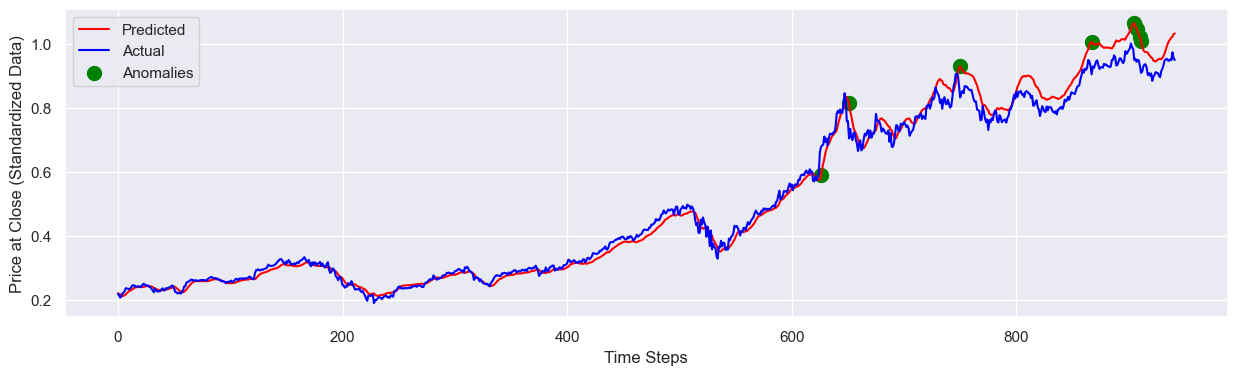

In [136]:

# Showing the predicted vs. actual values
fig, axs = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(15)

axs.plot(predictions,color='red', label='Predicted')
axs.plot(ytest,color='blue', label='Actual')
axs.scatter(outliers.index,outliers, color='green', linewidth=5.0, label='Anomalies')
plt.xlabel('Time Steps')
plt.ylabel('Price at Close (Standardized Data)')
plt.legend(loc='upper left')
plt.show()

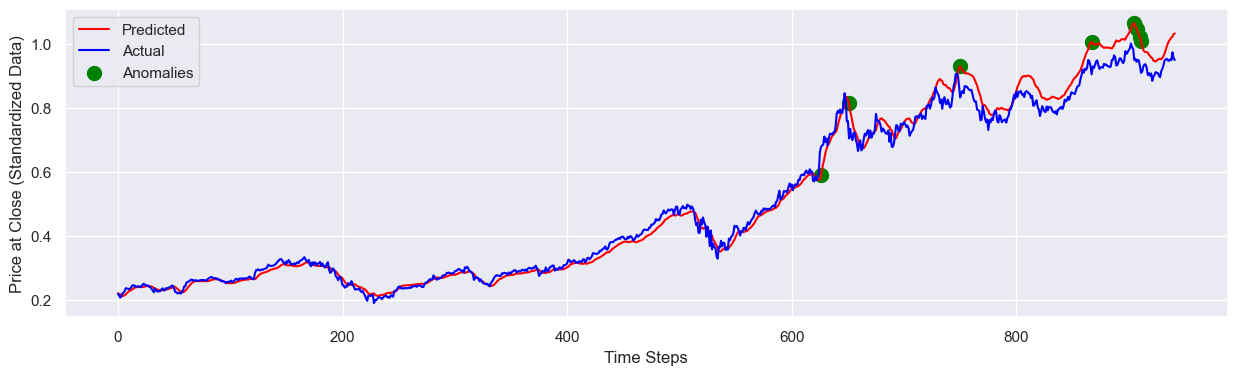

In [137]:

# Showing the predicted vs. actual values
fig, axs = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(15)

axs.plot(predictions,color='red', label='Predicted')
axs.plot(ytest,color='blue', label='Actual')
axs.scatter(outliers.index,outliers, color='green', linewidth=5.0, label='Anomalies')
plt.xlabel('Time Steps')
plt.ylabel('Price at Close (Standardized Data)')
plt.legend(loc='upper left')
plt.show()

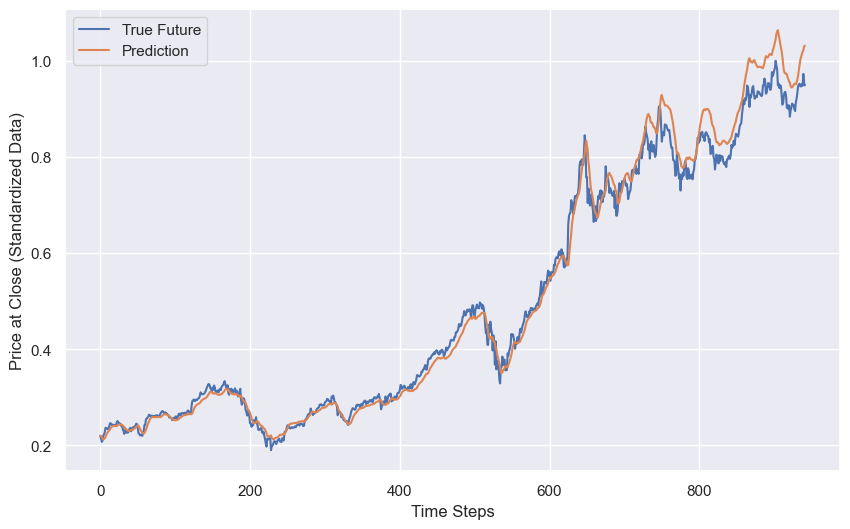

In [138]:
# Plot true future vs prediction plot true future (test data) vs prediction the three models.
plt.figure(figsize=(10, 6))
range_future = len(predictions)
plt.plot(np.arange(range_future), np.array(ytest), 
             label='True Future')     
plt.plot(np.arange(range_future),np.array(predictions),
            label='Prediction')
plt.legend(loc='upper left')
plt.xlabel('Time Steps')
plt.ylabel('Price at Close (Standardized Data)')
plt.show()


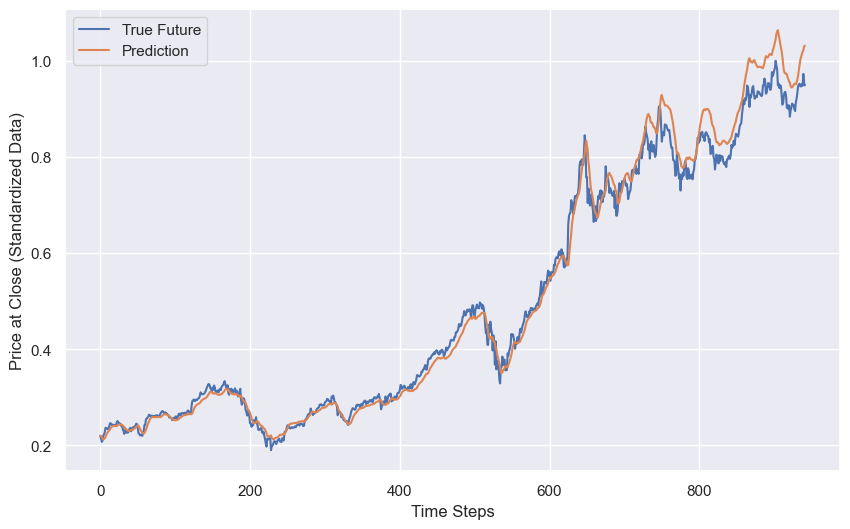

In [139]:
# Plot true future vs prediction plot true future (test data) vs prediction the three models.
plt.figure(figsize=(10, 6))
range_future = len(predictions)
plt.plot(np.arange(range_future), np.array(ytest), 
             label='True Future')     
plt.plot(np.arange(range_future),np.array(predictions),
            label='Prediction')
plt.legend(loc='upper left')
plt.xlabel('Time Steps')
plt.ylabel('Price at Close (Standardized Data)')
plt.show()
